In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# prompt: give me code to import data from drive

from google.colab import drive
drive.mount('/content/drive')
#The path to your file
file_path = '/content/drive/MyDrive/University Projects /Drugs /Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [ ]:
# Preprocessing
time_series_data = data[['YEAR', 'ESTIMATE']].dropna()
time_series_data = time_series_data.groupby('YEAR').mean().reset_index()  # Average rates per year

In [ ]:
# Rename columns for Prophet
time_series_data.rename(columns={'YEAR': 'ds', 'ESTIMATE': 'y'}, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
file_path = '/content/drive/MyDrive/University Projects /Drugs /Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'YEAR' and 'ESTIMATE' to numeric, handling errors
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce')
data['ESTIMATE'] = pd.to_numeric(data['ESTIMATE'], errors='coerce')

# Drop rows with missing values in 'YEAR' and 'ESTIMATE'
data = data.dropna(subset=['YEAR', 'ESTIMATE'])

# Group data by year and calculate mean estimates
# only for numeric columns using numeric_only=True
grouped_data = data.groupby('YEAR').mean(numeric_only=True).reset_index()

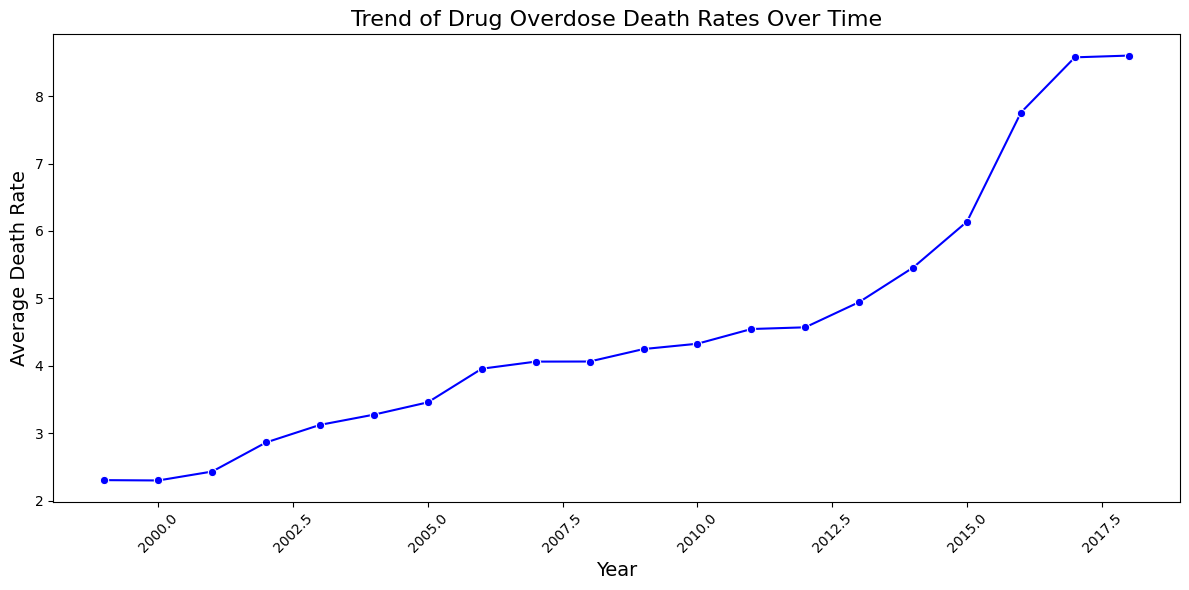

In [ ]:
# Visualization
# 1. Line Plot: Trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='YEAR', y='ESTIMATE', marker='o', color='blue')
plt.title('Trend of Drug Overdose Death Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Death Rate', fontsize=14)  # Changed y-axis label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

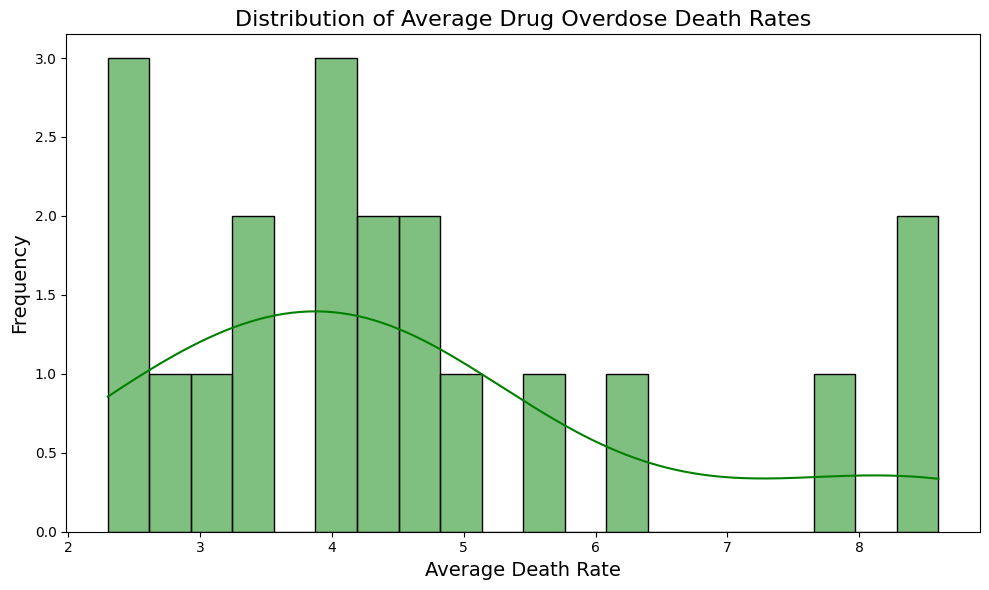

In [ ]:
# 2. Histogram: Distribution of Death Rates
plt.figure(figsize=(10, 6))
sns.histplot(grouped_data['ESTIMATE'], bins=20, kde=True, color='green')
plt.title('Distribution of Average Drug Overdose Death Rates', fontsize=16)
plt.xlabel('Average Death Rate', fontsize=14)  # Changed x-axis label
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-17-ae9c1b7595a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_data, x='Decade', y='ESTIMATE', palette='Set2')


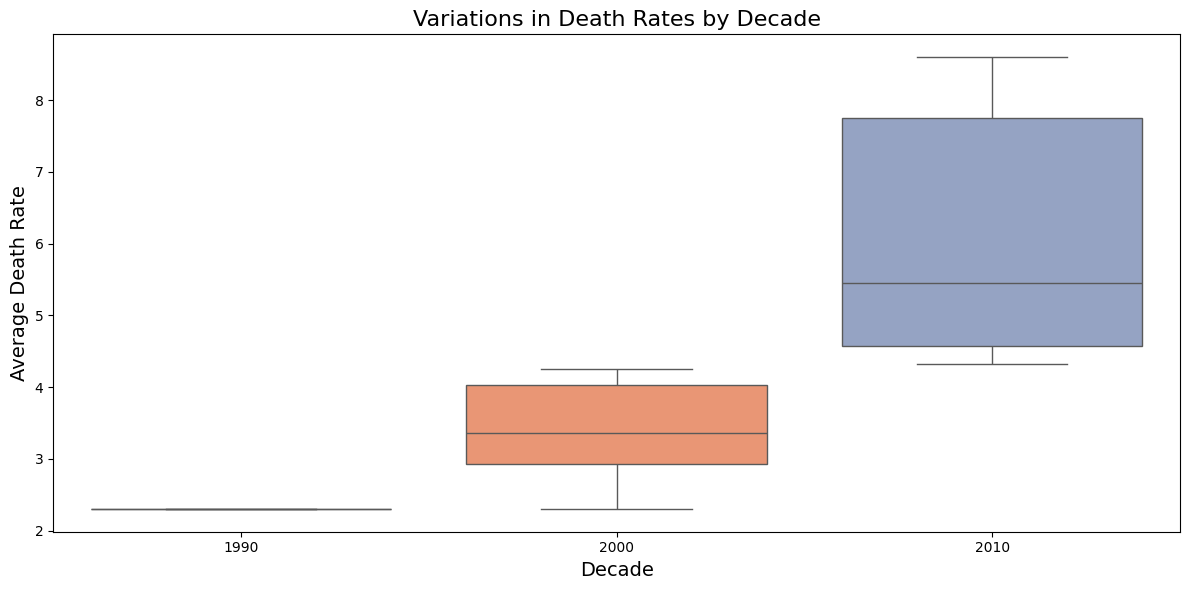

In [ ]:

# 3. Box Plot: Variations over Time (e.g., decades)
grouped_data['Decade'] = (grouped_data['YEAR'] // 10) * 10  # Create decade column
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_data, x='Decade', y='ESTIMATE', palette='Set2')
plt.title('Variations in Death Rates by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Death Rate', fontsize=14)
plt.tight_layout()
plt.show()



<ipython-input-18-078357258f4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=grouped_data, x='Decade', y='ESTIMATE', palette='viridis')


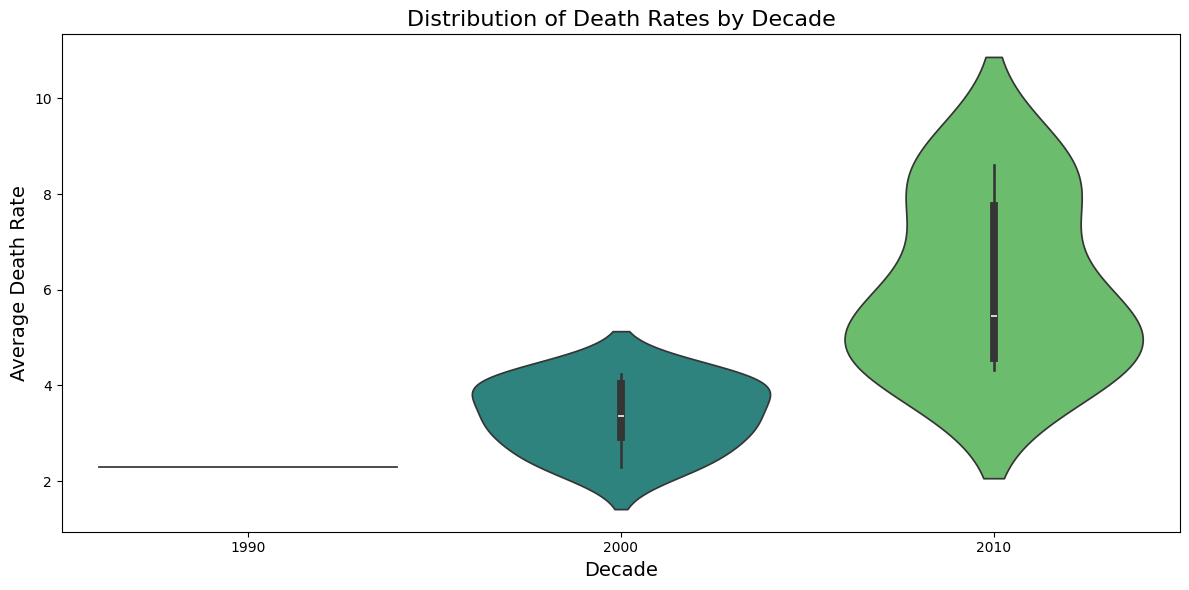

In [ ]:
# 4. Violin Plot: Similar to Box Plot but with Density
plt.figure(figsize=(12, 6))
sns.violinplot(data=grouped_data, x='Decade', y='ESTIMATE', palette='viridis')
plt.title('Distribution of Death Rates by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Death Rate', fontsize=14)
plt.tight_layout()
plt.show()

1. Area Plot: Cumulative Trends Over Time

Shows how drug overdose death rates evolve cumulatively over years.


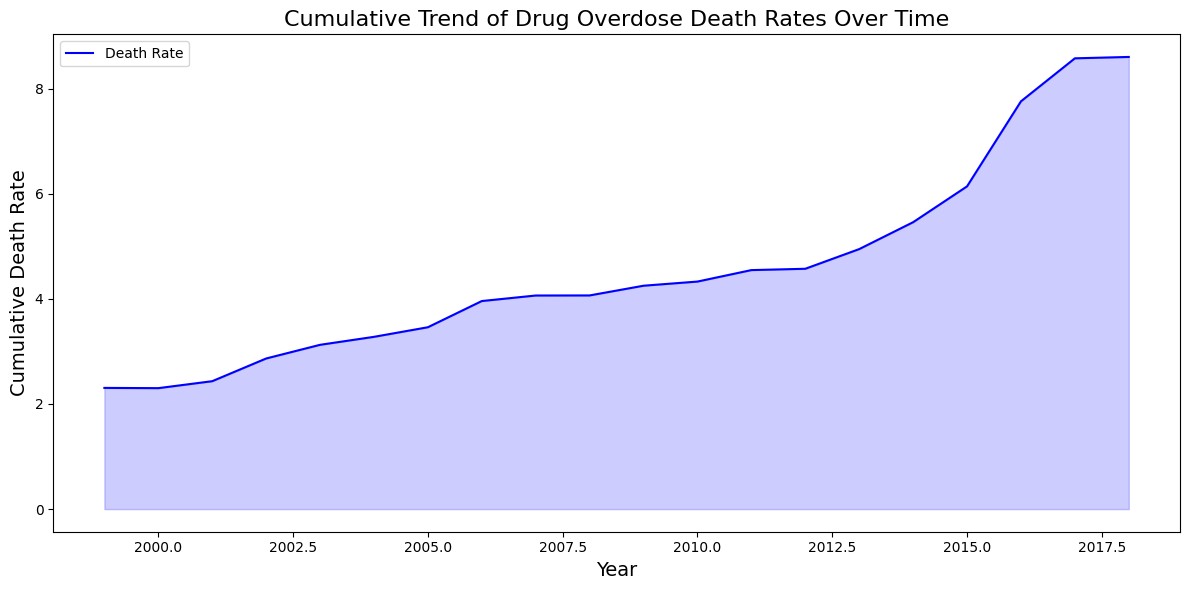

In [ ]:
# Area Plot: Cumulative Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='YEAR', y='ESTIMATE', color='blue', label='Death Rate')
plt.fill_between(grouped_data['YEAR'], grouped_data['ESTIMATE'], color='blue', alpha=0.2)
plt.title('Cumulative Trend of Drug Overdose Death Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Death Rate', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


2. Bar Chart with Annotated Averages

Shows the average death rate for each year with annotations.

<ipython-input-20-d5e3b8b7840f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='YEAR', y='ESTIMATE', palette='Blues_d')


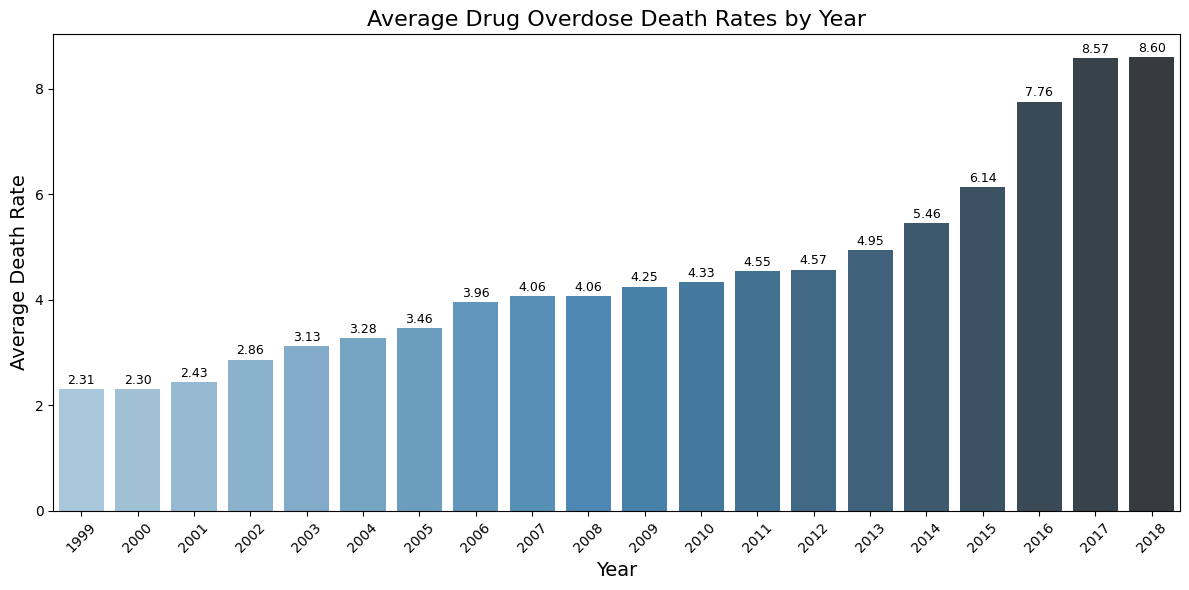

In [ ]:
# Bar Chart with Annotations
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='YEAR', y='ESTIMATE', palette='Blues_d')
for i, val in enumerate(grouped_data['ESTIMATE']):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', fontsize=9)
plt.title('Average Drug Overdose Death Rates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Death Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Violin Plot for Yearly Death Rate Distributions

Combines boxplot and KDE for understanding yearly variations

<ipython-input-21-4b752c12a4a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='YEAR', y='ESTIMATE', palette='coolwarm', scale='count', cut=0)
<ipython-input-21-4b752c12a4a7>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=data, x='YEAR', y='ESTIMATE', palette='coolwarm', scale='count', cut=0)


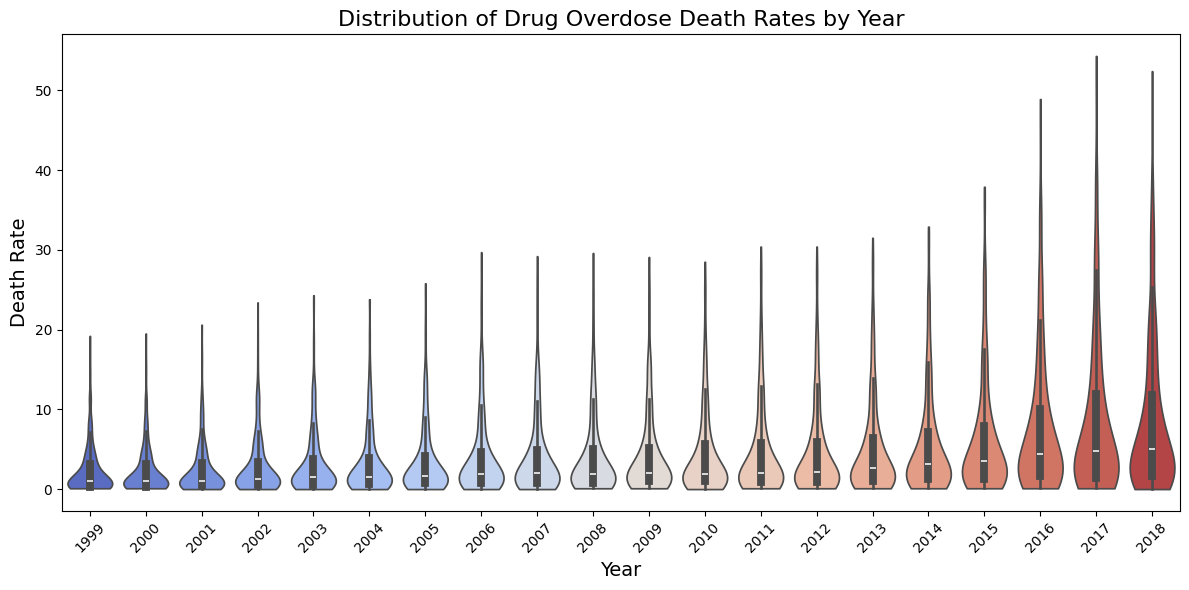

In [ ]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='YEAR', y='ESTIMATE', palette='coolwarm', scale='count', cut=0)
plt.title('Distribution of Drug Overdose Death Rates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Heatmap for Correlations

Shows the relationships between numeric columns.

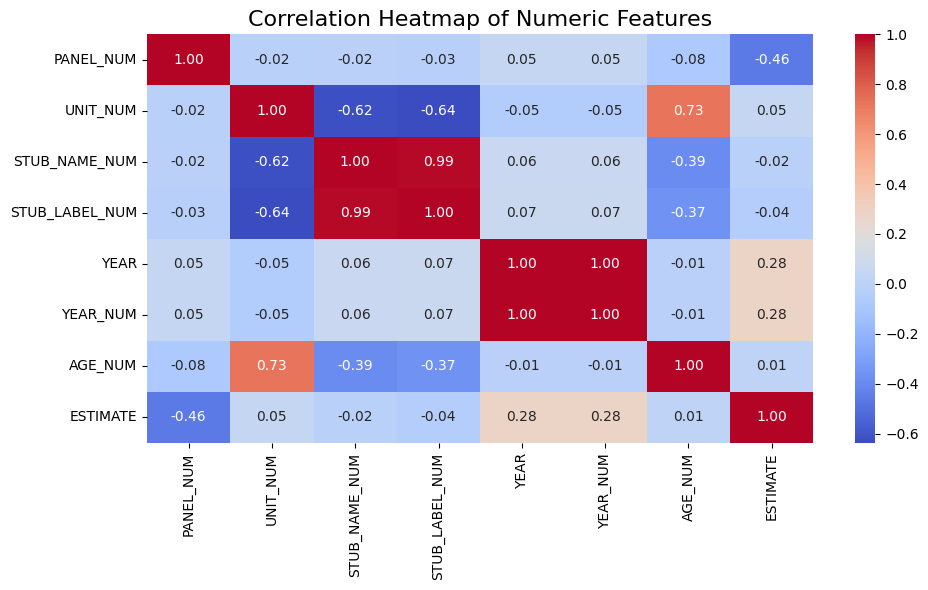

In [ ]:
# Heatmap for Correlations
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


5. Ridge Plot for Density of Death Rates Across Years

Provides an artistic and detailed density representation.

<Figure size 1200x800 with 0 Axes>

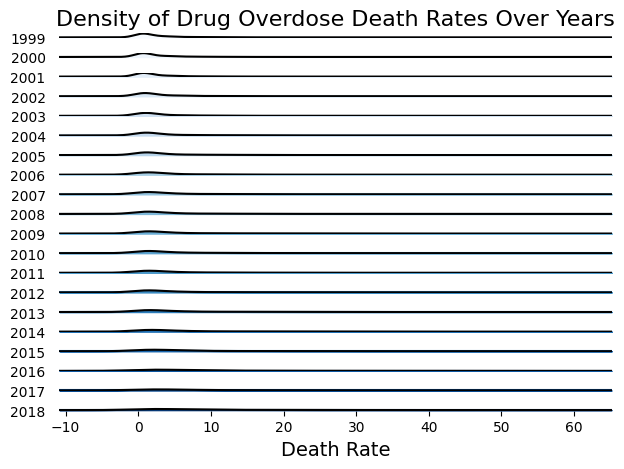

In [ ]:
!pip install joypy # Install the joypy package
import joypy

# Ridge Plot
plt.figure(figsize=(12, 8))
joypy.joyplot(
    data=data[['YEAR', 'ESTIMATE']].dropna(),
    by='YEAR',
    column='ESTIMATE',
    colormap=plt.cm.Blues
)
plt.title('Density of Drug Overdose Death Rates Over Years', fontsize=16)
plt.xlabel('Death Rate', fontsize=14)
plt.tight_layout()
plt.show()

6. Highlighted Line Chart: Top/Bottom Years

Highlights the years with the highest and lowest death rates.

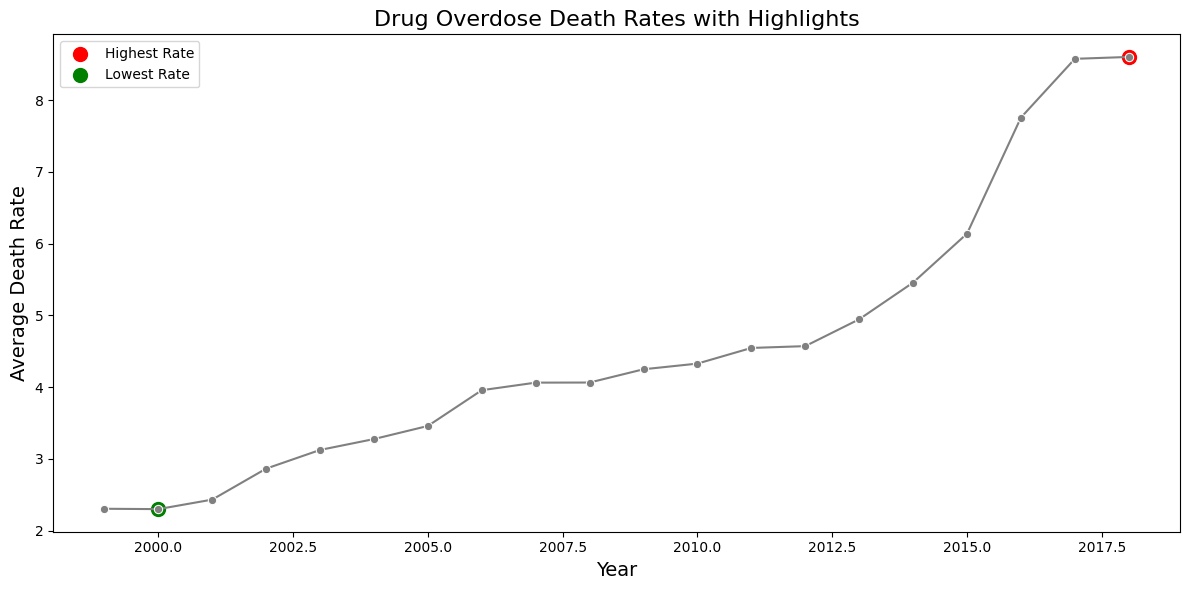

In [ ]:
# Highlighting Top and Bottom Years
top_year = grouped_data.loc[grouped_data['ESTIMATE'].idxmax()]
bottom_year = grouped_data.loc[grouped_data['ESTIMATE'].idxmin()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='YEAR', y='ESTIMATE', marker='o', color='grey')
plt.scatter(top_year['YEAR'], top_year['ESTIMATE'], color='red', label='Highest Rate', s=100)
plt.scatter(bottom_year['YEAR'], bottom_year['ESTIMATE'], color='green', label='Lowest Rate', s=100)
plt.title('Drug Overdose Death Rates with Highlights', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Death Rate', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Bubble Chart: Size Represents Impact

Shows the relationship between YEAR and ESTIMATE, with the bubble size representing another variable (e.g., a count or an additional metric).

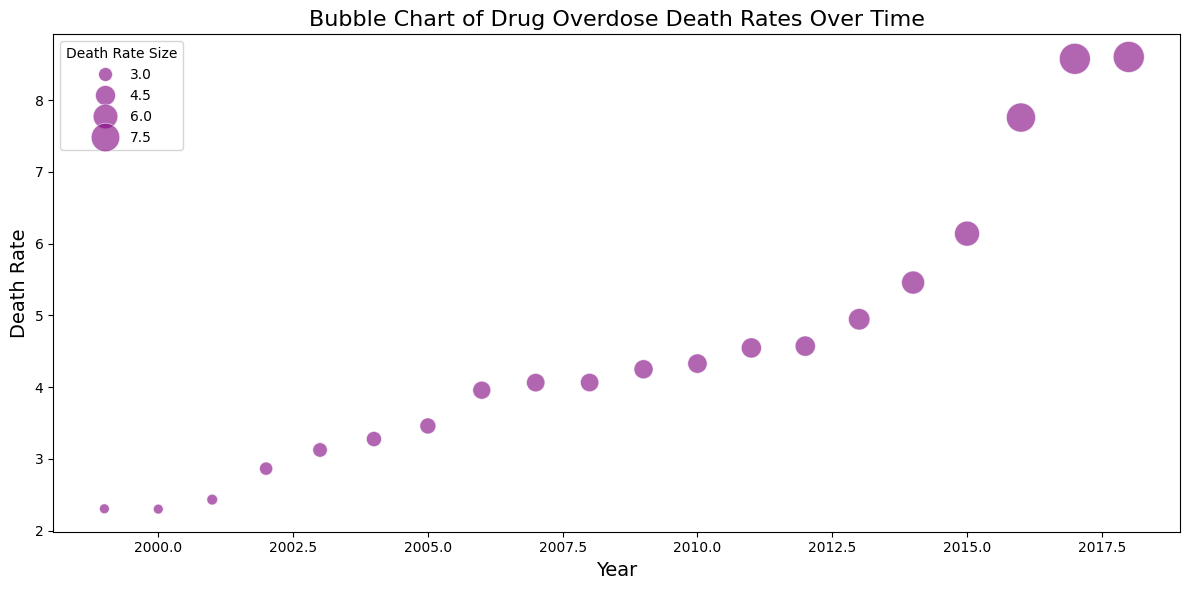

In [ ]:
# Bubble Chart
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=grouped_data,
    x='YEAR',
    y='ESTIMATE',
    size='ESTIMATE',  # Bubble size corresponds to death rates
    sizes=(50, 500),
    alpha=0.6,
    color='purple'
)
plt.title('Bubble Chart of Drug Overdose Death Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.legend(title='Death Rate Size')
plt.tight_layout()
plt.show()


Facet Grid by Decades

Visualizes trends for different decades side-by-side.

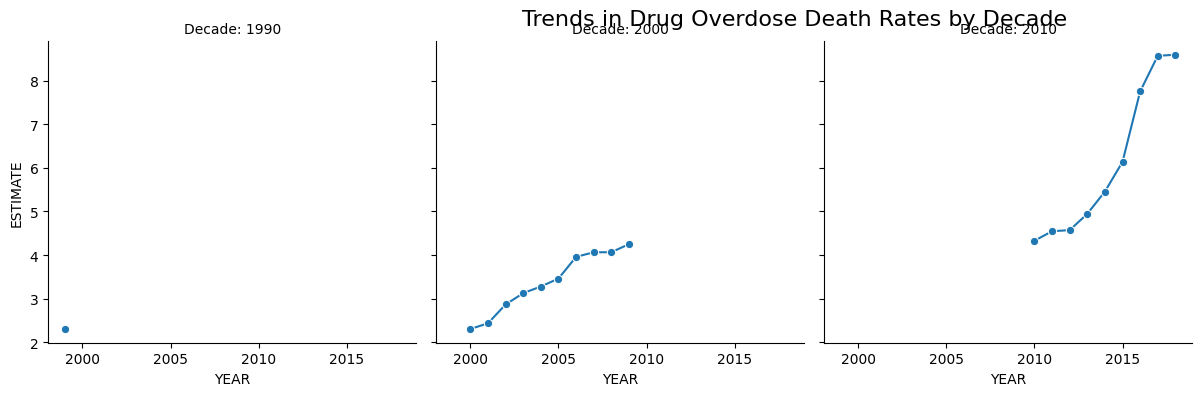

In [ ]:
# Add Decade Column
grouped_data['Decade'] = (grouped_data['YEAR'] // 10) * 10

# Facet Grid by Decade
g = sns.FacetGrid(grouped_data, col="Decade", col_wrap=4, height=4, sharey=True)
g.map(sns.lineplot, "YEAR", "ESTIMATE", marker="o")
g.set_titles("Decade: {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Trends in Drug Overdose Death Rates by Decade", fontsize=16)
plt.show()


Animated Line Plot

Shows how death rates evolve year by year in an animated format.

In [ ]:
import plotly.express as px

# Animated Line Plot
fig = px.line(
    grouped_data,
    x='YEAR',
    y='ESTIMATE',
    title='Animated Trends of Drug Overdose Death Rates',
    labels={'ESTIMATE': 'Death Rate'},
    animation_frame='YEAR',
)
fig.show()


Polar Plot for Seasonal/Yearly Patterns

Visualizes periodic trends, such as how death rates change seasonally or cyclically.


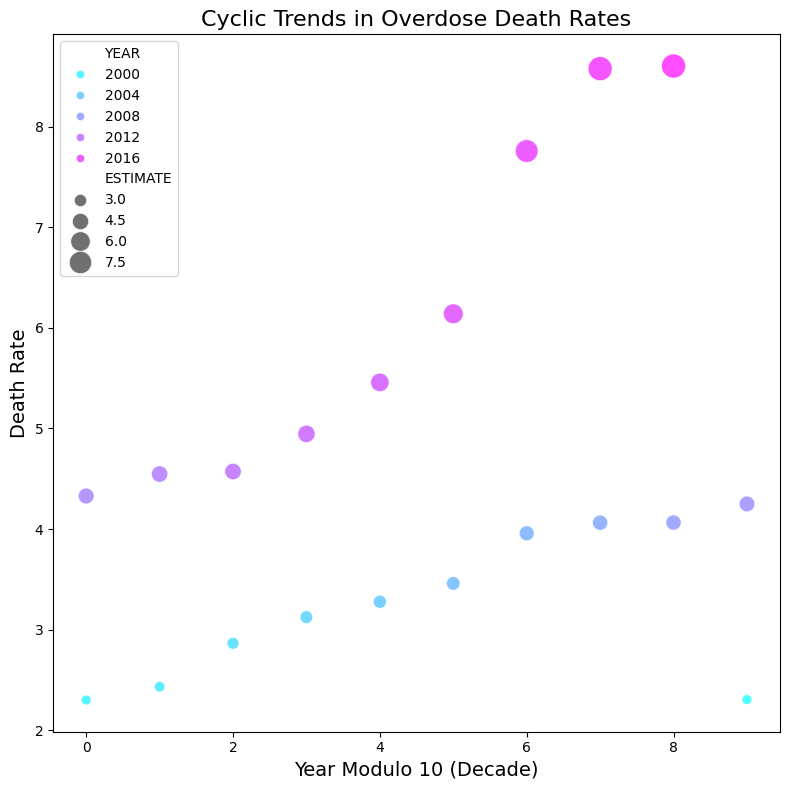

In [ ]:
# Polar Plot
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=grouped_data,
    x=grouped_data['YEAR'] % 10,  # Cyclic trend within a decade
    y='ESTIMATE',
    hue='YEAR',
    palette='cool',
    size='ESTIMATE',
    sizes=(50, 300),
    alpha=0.7
)
plt.title('Cyclic Trends in Overdose Death Rates', fontsize=16)
plt.xlabel('Year Modulo 10 (Decade)', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.tight_layout()
plt.show()


Chord Diagram

Represents connections and relationships (e.g., between drug types and demographics).


In [ ]:
import plotly.graph_objects as go

# Chord Diagram
fig = go.Figure(
    data=go.Sankey(
        node=dict(
            label=["Drug Type A", "Drug Type B", "Male", "Female"],
            color=["blue", "green", "red", "purple"]
        ),
        link=dict(
            source=[0, 0, 1, 1],  # Drug Types
            target=[2, 3, 2, 3],  # Demographics
            value=[10, 20, 5, 15]  # Overdose counts
        )
    )
)
fig.update_layout(title_text="Chord Diagram of Drug Types and Demographics", font_size=10)
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

Mean Squared Error: 3.53


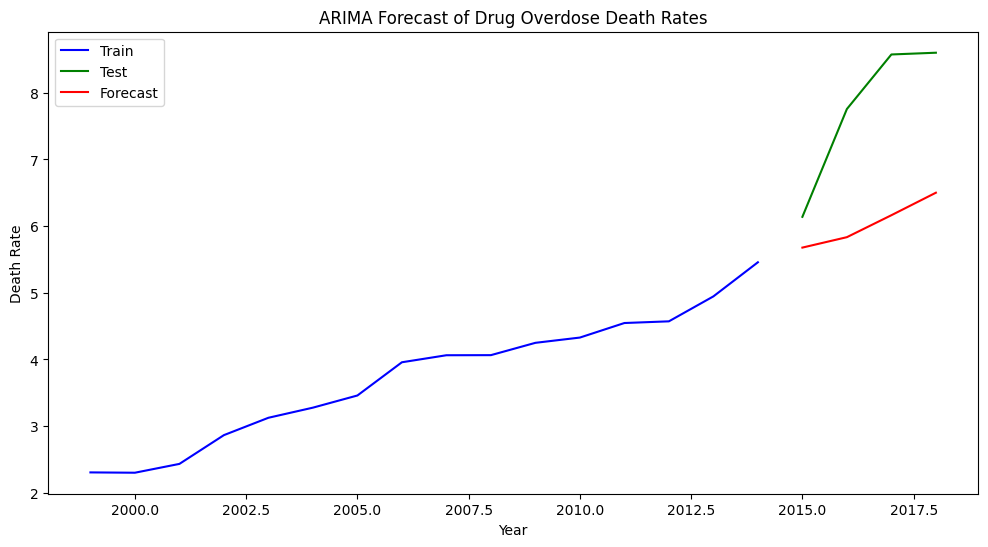

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
file_path = '/content/drive/MyDrive/University Projects /Drugs /Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'YEAR' and 'ESTIMATE' to numeric, handling errors
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce')
data['ESTIMATE'] = pd.to_numeric(data['ESTIMATE'], errors='coerce')

# Drop rows with missing values in 'YEAR' and 'ESTIMATE'
data = data.dropna(subset=['YEAR', 'ESTIMATE'])

# Group data by year and calculate mean estimates
grouped_data = data.groupby('YEAR').mean(numeric_only=True).reset_index()

# Prepare the time series data
time_series = grouped_data.set_index('YEAR')['ESTIMATE']

# Split the data into train and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) parameters as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Drug Overdose Death Rates')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

# Additional performance metrics
rmse = math.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 1.88
MAE: 1.72
MAPE: 0.21%


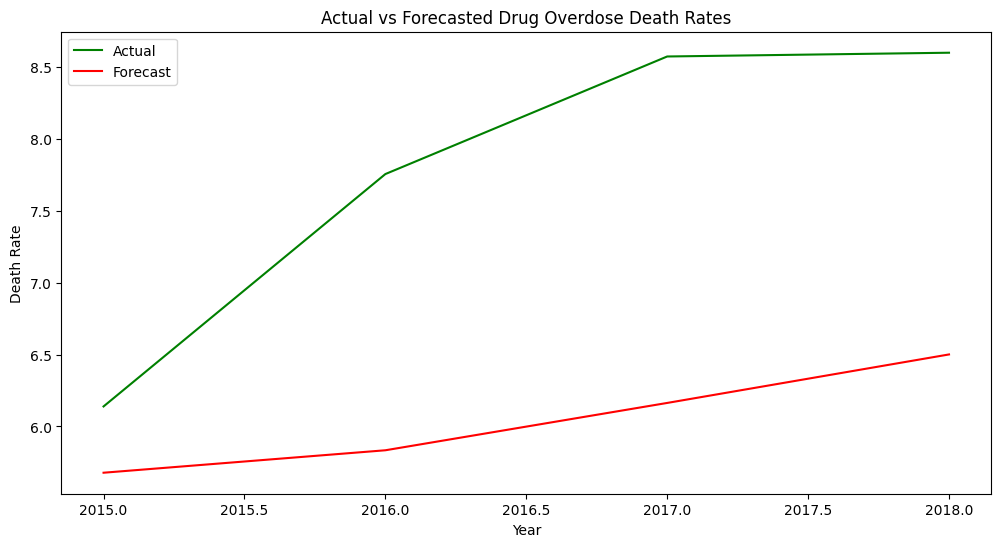

In [ ]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Drug Overdose Death Rates')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend()
plt.show()


# Forecasting Future Drug Overdose Death Rates

  **  Using the trained ARIMA model, predict future drug overdose death rates (next 5-10 years). This could help inform policy-making, healthcare strategies, or preventive programs.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



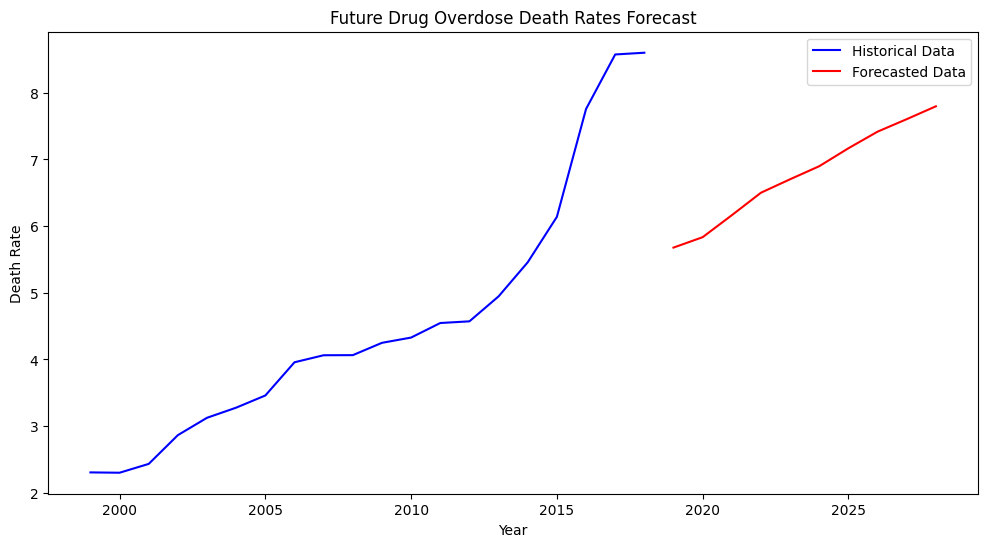

In [ ]:
# Forecast future drug overdose death rates (e.g., for the next 10 years)
forecast_years = 10
forecast_future = model_fit.forecast(steps=forecast_years)

# Plot the forecast for future years
future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + forecast_years + 1)

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Data', color='blue')
plt.plot(future_years, forecast_future, label='Forecasted Data', color='red')
plt.title('Future Drug Overdose Death Rates Forecast')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend()
plt.show()


# Anomaly Detection for Sudden Spikes in Drug Overdose Rates

   ** Detect and visualize sudden spikes or anomalies in drug overdose death rates using statistical techniques or machine learning algorithms. This could help identify years with unusual trends (e.g., due to policy changes, economic shifts, etc.).**

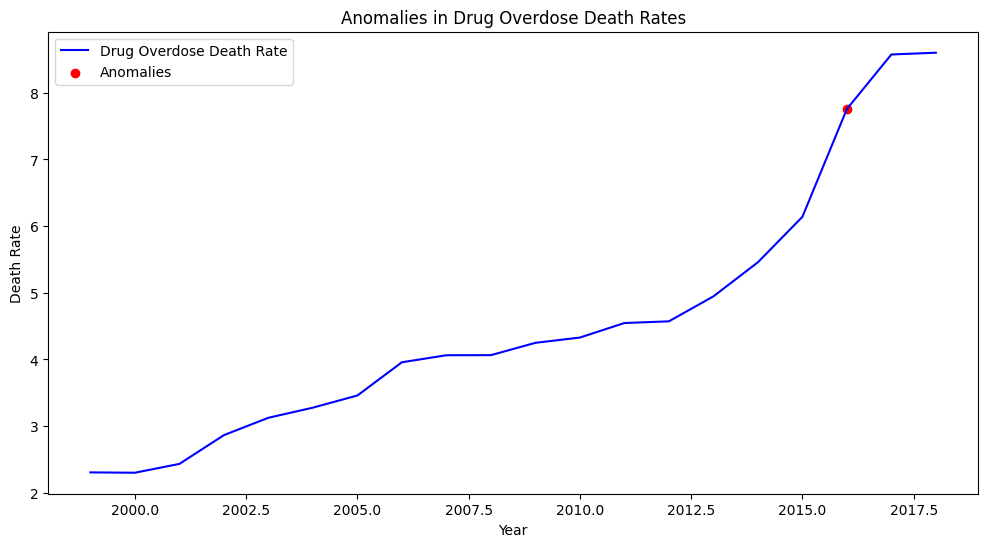

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit IsolationForest to detect anomalies in the data
model = IsolationForest(contamination=0.05)
anomalies = model.fit_predict(time_series.values.reshape(-1, 1))

# Mark anomalies
anomaly_indices = np.where(anomalies == -1)[0]

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Drug Overdose Death Rate', color='blue')
plt.scatter(time_series.index[anomaly_indices], time_series.values[anomaly_indices], color='red', label='Anomalies')
plt.title('Anomalies in Drug Overdose Death Rates')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend()
plt.show()


# Time Series Decomposition for Trend, Seasonality, and Residuals

  **  Decompose the time series into trend, seasonality, and residuals to better understand the underlying patterns.**

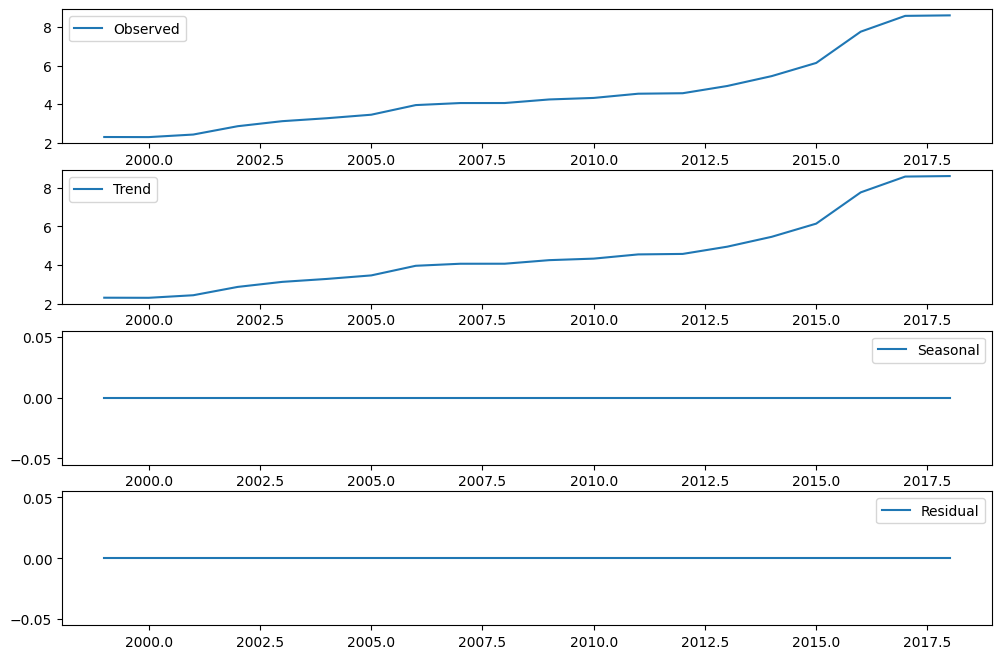

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.show()


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to preprocess the data
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce')
    data['ESTIMATE'] = pd.to_numeric(data['ESTIMATE'], errors='coerce')
    data = data.dropna(subset=['YEAR', 'ESTIMATE'])
    grouped_data = data.groupby('YEAR').mean(numeric_only=True).reset_index()
    return grouped_data.set_index('YEAR')['ESTIMATE']

# Function to fit the ARIMA model
def fit_arima(train, p, d, q):
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()
    return model_fit

# Main Streamlit app
def main():
    # File upload widget to upload the dataset
    st.title('Drug Overdose Death Rate Predictor')
    st.write('Upload the dataset to predict drug overdose death rates based on ARIMA.')

    # File uploader
    file_path = st.file_uploader("Upload CSV File", type="csv")

    if file_path is not None:
        data = preprocess_data(file_path)
        st.write("Data Preview:", data.head())

        # Split the data into training and testing datasets
        train_size = int(len(data) * 0.8)
        train, test = data[:train_size], data[train_size:]

        # Input sliders for ARIMA parameters
        p = st.slider("ARIMA - p (AutoRegressive)", 0, 10, 5)
        d = st.slider("ARIMA - d (Differencing)", 0, 3, 1)
        q = st.slider("ARIMA - q (Moving Average)", 0, 10, 0)

        # Fit the ARIMA model
        model_fit = fit_arima(train, p, d, q)

        # Forecasting
        forecast_steps = len(test)
        forecast = model_fit.forecast(steps=forecast_steps)

        # Evaluate the model
        mse = mean_squared_error(test, forecast)
        st.write(f"Mean Squared Error (MSE): {mse:.2f}")

        # Plot the results
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(train, label='Train', color='blue')
        ax.plot(test, label='Test', color='green')
        ax.plot(test.index, forecast, label='Forecast', color='red')
        ax.set_title(f'ARIMA Forecast (p={p}, d={d}, q={q})')
        ax.set_xlabel('Year')
        ax.set_ylabel('Death Rate')
        ax.legend()
        st.pyplot(fig)

        # Forecast future death rates (next 5 years)
        forecast_years = 5
        future_forecast = model_fit.forecast(steps=forecast_years)
        future_years = np.arange(data.index[-1] + 1, data.index[-1] + forecast_years + 1)

        # Plot future forecast
        fig2, ax2 = plt.subplots(figsize=(12, 6))
        ax2.plot(data, label='Historical Data', color='blue')
        ax2.plot(future_years, future_forecast, label='Future Forecast', color='orange')
        ax2.set_title('Future Drug Overdose Death Rates Forecast')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Death Rate')
        ax2.legend()
        st.pyplot(fig2)

if __name__ == "__main__":
    main()


2024-12-26 07:12:03.800 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.318 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-26 07:12:04.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 07:12:04.350 Thread 'MainThread': mi

In [ ]:
# prompt: give me code to generate the pickle file for the abive model

import pickle
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import joypy
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
#import streamlit as st # This is not needed for pickling


# Load and clean the dataset (replace with your actual file path)
file_path = '/content/drive/MyDrive/University Projects /Drugs /Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv'
data = pd.read_csv(file_path)

# ... [Your entire existing code for data preprocessing and model fitting] ...

# Example: Assuming 'model_fit' is your trained ARIMA model
# Save the model to a pickle file
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

# Optionally, save other relevant objects (e.g., preprocessed data)
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(time_series, f) # Or grouped_data, or whatever is relevant

In [ ]:
import pickle
# Save the model to a pickle file
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

# Optionally, save other relevant objects (e.g., preprocessed data)
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(time_series, f) # Or grouped_data, or whatever is relevant

In [ ]:
# prompt: give me code to download the generated pickle file

from google.colab import files
files.download('arima_model.pkl')
files.download('preprocessed_data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>